# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

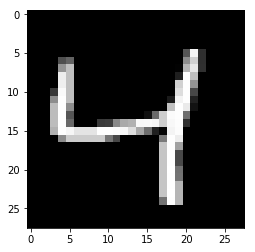

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
mnist.train.images.shape

(60000, 784)

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
img_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, [None, img_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, img_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, img_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

## Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6872
Epoch: 1/20... Training loss: 0.6835
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6731
Epoch: 1/20... Training loss: 0.6672
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6491
Epoch: 1/20... Training loss: 0.6390
Epoch: 1/20... Training loss: 0.6264
Epoch: 1/20... Training loss: 0.6149
Epoch: 1/20... Training loss: 0.5990
Epoch: 1/20... Training loss: 0.5804
Epoch: 1/20... Training loss: 0.5675
Epoch: 1/20... Training loss: 0.5475
Epoch: 1/20... Training loss: 0.5301
Epoch: 1/20... Training loss: 0.5152
Epoch: 1/20... Training loss: 0.4927
Epoch: 1/20... Training loss: 0.4757
Epoch: 1/20... Training loss: 0.4553
Epoch: 1/20... Training loss: 0.4478
Epoch: 1/20... Training loss: 0.4222
Epoch: 1/20... Training loss: 0.4087
Epoch: 1/20... Training loss: 0.3935
Epoch: 1/20... Training loss: 0.3839
Epoch: 1/20... Training loss: 0.3683
E

Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1986
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1943
E

Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1546
E

Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1377
E

Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1286
E

Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1211
E

Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1103
E

Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1076
E

Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0984
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0980
E

Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0940
E

Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0988
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

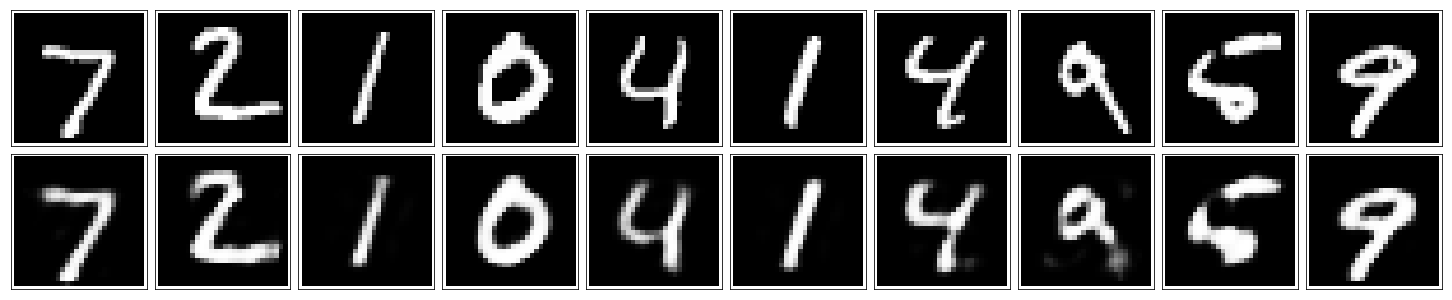

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.